# Многослойный перцептрон

## Лабораторная работа №4

Присвойте строку с вашим ФИО переменной `name` и выполните ячейку. В ее выводе будет указан номер вашего варианта.

In [2]:
name = "Шатаров Кирилл Александрович"

def calculate_variant(name):
    return sum(ord(char) for char in name) % 2 + 1

print(f"Ваш вариант - №{calculate_variant(name)}")

Ваш вариант - №2



---

**Впишите в эту ячейку ваши ФИО, группу и вариант**.

ФИО: Шатаров Кирилл Александрович

Группа: 211-365

Вариант: №2

---

Далее по ходу ноутбука вам встрется ячейки с кодом, в которых будут комментарии с заданиями, и текстовые ячейки как эта с вопросами, на которые вам необходимо письменно в ноутбуке ответить.

Все ячейки необходимо запускать.

Данные для вариантов лежат по ссылкам:

1. http://labcolor.space/mlp-1.csv
1. http://labcolor.space/mlp-2.csv

Скопируйте ссылку для своего варианта.

## Импорт модулей

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split

## Загрузка данных

Используя уже знакомые вам функции, загрузите данные и проведите их анализ на предмет количества признаков, объектов и классов. В данных последний столбец это целевой признак, а первая строка — это порядковый номер признака начиная с 0.

In [3]:
df = pd.read_csv("http://labcolor.space/mlp-2.csv")
df.head()

,0,1,2,3,4,5,6,7,8,9,...,91,92,93,94,95,96,97,98,99,100
0,10.254155,6.456498,5.753013,7.362006,-3.275942,4.235079,-13.745790,9.689982,-3.533689,6.917225,...,7.697823,7.451562,-2.842100,-6.818141,1.837982,-4.743549,-3.434180,3.539593,3.536859,7
1,-0.188422,-4.291450,3.208396,-2.620343,1.071647,5.776388,3.559500,8.054400,6.300035,3.491333,...,1.814030,2.642279,4.374068,5.808833,-5.916498,4.262621,1.516000,0.015446,13.127266,7
2,6.006333,6.405122,0.215123,-0.535726,-1.816995,-2.706071,-5.393072,1.153604,-2.691906,-3.108858,...,-3.764842,-3.675805,1.504159,5.345504,12.229908,9.397199,9.019515,-2.510086,3.123849,6
3,-14.907643,-6.559742,5.417358,15.872302,6.523179,1.375495,-3.886285,-6.892180,2.041143,-7.689962,...,0.059781,-5.889617,5.613364,2.668084,-0.054000,4.005976,-8.868624,9.375650,-3.635482,7
4,4.393847,-1.035926,0.905016,-5.079603,-3.174534,-6.252063,4.937048,7.961506,-7.844759,7.039012,...,0.301236,3.700054,-7.928076,5.380378,3.981723,-10.995349,1.430469,-1.562244,-1.682252,5


In [4]:
df.shape

(4000, 101)

In [5]:
df.describe()

,0,1,2,3,4,5,6,7,8,9,...,91,92,93,94,95,96,97,98,99,100
count,3999.000000,3999.000000,4000.000000,4000.000000,4000.000000,3999.000000,3999.000000,4000.000000,3999.000000,4000.000000,...,3999.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,3999.000000,4000.000000,4000.000000
mean,0.024746,0.500394,-0.051431,0.195077,-0.173320,-0.008179,0.266138,-0.376966,0.026357,-0.101055,...,-0.404663,0.158582,0.383045,0.165495,-0.503738,-0.323991,0.105799,0.518621,0.257474,3.501000
std,5.676004,5.550694,5.662355,5.450803,5.517875,5.566616,5.654875,5.511465,5.535498,5.348943,...,5.582902,5.519649,5.603523,5.685317,5.525141,5.618171,5.701498,5.622377,5.592407,2.291356
min,-19.405287,-22.652231,-19.667265,-21.881980,-19.741271,-19.654484,-18.533880,-19.623795,-20.089030,-18.279167,...,-21.406687,-19.159398,-22.002759,-22.618761,-21.258031,-21.695871,-24.238754,-19.956897,-18.751769,0.000000
25%,-3.728930,-3.353507,-3.786081,-3.441829,-3.843433,-3.745855,-3.529528,-4.005876,-3.610773,-3.823280,...,-4.030346,-3.620666,-3.403997,-3.574715,-4.216778,-4.049489,-3.773541,-3.259576,-3.543963,1.000000
50%,0.006111,0.509518,-0.077131,0.240650,-0.101706,0.058320,0.323044,-0.339816,-0.033490,-0.101047,...,-0.335830,0.060452,0.346543,0.028579,-0.517919,-0.367989,0.157999,0.578396,0.212288,3.000000
75%,3.865709,4.257142,3.685468,3.886383,3.578177,3.787004,4.056428,3.318970,3.743444,3.433963,...,3.354380,3.801935,4.256211,3.839960,3.210718,3.448604,4.017386,4.315890,4.029235,5.000000
max,21.501254,20.473739,21.172589,22.534479,18.682272,19.899053,21.004332,18.777280,20.167018,18.108598,...,23.011847,21.531888,24.865558,19.736466,21.330885,19.314840,17.588632,18.988684,21.919094,7.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Columns: 101 entries, 0 to 100
dtypes: float64(100), int64(1)
memory usage: 3.1 MB


In [7]:
df['100'].value_counts()

5    506
1    506
7    504
2    501
3    500
0    495
4    495
6    493
Name: 100, dtype: int64

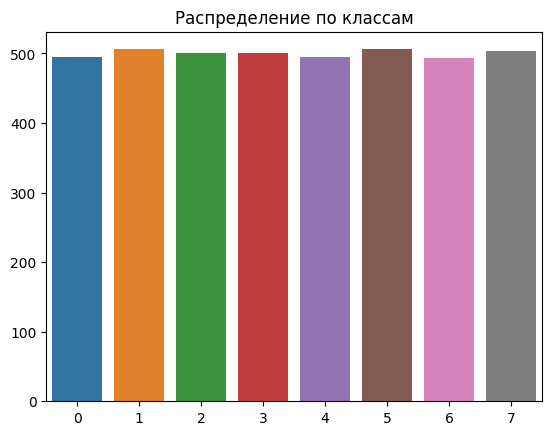

In [8]:
labels, counts = np.unique(df['100'], return_counts=True)
fig, axs = plt.subplots(ncols=1)
sns.barplot(x=[str(label) for label in labels], y=counts, ax=axs).set_title("Распределение по классам")
plt.show()

**Описание данных**

Ваш ответ:

Число объектов: **4000**

Число признаков: **100 факторных и 1 целевой**

Число классов целевого признака: **8**

## Подготовка данных

Убедитесь что в данных нет отсутствующих значений, если они есть, удалите их или заполните средними значениями - `df.isnull()`.

In [9]:
df.isnull().sum()

0      1
1      1
2      0
3      0
4      0
      ..
96     0
97     0
98     1
99     0
100    0
Length: 101, dtype: int64

In [10]:
cols_with_missing_values = df.columns[df.isnull().any()]
print(cols_with_missing_values)

Index(['0', '1', '5', '6', '8', '10', '14', '20', '24', '26', '29', '39', '44',
       '49', '55', '57', '73', '80', '91', '98'],
      dtype='object')


In [11]:
df = df.fillna(df.mean()) # заполнение средним значением

In [12]:
df.isnull().sum()

0      0
1      0
2      0
3      0
4      0
      ..
96     0
97     0
98     0
99     0
100    0
Length: 101, dtype: int64

**Были ли отсутствующие значения и что вы с ними сделали?**

Ваш ответ: Были отсутствующие значения в столбцах ['0', '1', '5', '6', '8', '10', '14', '20', '24', '26', '29', '39', '44',
       '49', '55', '57', '73', '80', '91', '98'], они были заполнены средним значением по столбцу.

In [13]:
y = df.pop('100')
X = df

С помощью `train_test_split` разделите данные на обучающие и тестовые (15-20%). Не забудьте про `random_state`.

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.15)

Масштабируйте признаки. Для этого импортируйте соответствующий класс, создайте его экземпляр, выполните его "подгонку" и примените его к признакам.

In [15]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [16]:
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)

In [17]:
scaler.fit(X_train)
X_test_scaled = scaler.transform(X_test)

## Обучение модели и подборка гиперпараметров

Гиперпараметры и их значения задаются в виде словаря и затем вместе с экземпляром модели в качестве аргументов передаются в конструктор класса `GridSearchCV`, который будет создавать разные варианты модели и обучать их, используя кросс валидацию, сохраняя промежуточные результаты.

Попробуйте разные варианты:
* количества нейронов в скрытых слоях (hidden_layer_sizes),
* функций активации (activation),
* скорости обучения (learning_rate_init).

**Что такое гиперпараметры для модели?**

Ваш ответ: Гиперпараметры — это настраиваемые параметры, позволяющие управлять процессом обучения модели, задаются до начала процесса обучения и остаются постоянными в течение всего обучения.

**Опишите суть кросс валидации.**

Ваш ответ: Кросс-валидация - это метод оценки производительности модели машинного обучения, который позволяет оценить её способность обобщения на независимых данных. Суть кросс-валидации заключается в разделении доступного набора данных на несколько частей (фолдов) и последовательном использовании части данных для обучения модели и другой части для её тестирования.

**В чем заключается идея поиска по сетке (grid search)?**

Ваш ответ: Идея поиска по сетке (grid search) заключается в систематическом переборе различных комбинаций гиперпараметров модели с целью нахождения наилучших параметров, обеспечивающих оптимальную производительность модели.

In [18]:
param_grid = {
    'hidden_layer_sizes' : [400, 500, 600, 700],
}
#'activation' : ['logistic', 'tanh', 'relu'],
#'learning_rate_init' : [0.0004, 0.0005, 0.0007, 0.0009, 0.0015]

**Сколько вариантов модели будет в итоге обучено?**

Ваш ответ: Будет обучено 60 вариантов модели (4 * 3 * 5 = 60).

In [19]:
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier

In [20]:
mlp = MLPClassifier(random_state=42, max_iter=2000, learning_rate='adaptive', solver='sgd', learning_rate_init=0.0005, activation='relu')

grid_search = GridSearchCV(mlp, param_grid, cv=3, scoring='accuracy')
grid_search.fit(X_train_scaled, y_train)

GridSearchCV(cv=3,
             estimator=MLPClassifier(learning_rate='adaptive',
                                     learning_rate_init=0.0005, max_iter=2000,
                                     random_state=42, solver='sgd'),
             param_grid={'hidden_layer_sizes': [400, 500, 600, 700]},
             scoring='accuracy')

**Что значит cv=3 для GridSearchCV?**

Ваш ответ: Параметр cv=3 для GridSearchCV означает, что процесс кросс-валидации будет выполняться с использованием 3 фолдов (разбиений) данных. То есть данные будут разделены на 3 части, и модель будет обучаться и тестироваться 3 раза, каждый раз используя разные комбинации частей данных в качестве обучающего и тестового наборов.

In [21]:
print(f"Гиперпараметры модели с лучшим результатом: {grid_search.best_params_}")
print(f"Лучшая точность при кросс валидации: {grid_search.best_score_:.2f}")

Гиперпараметры модели с лучшим результатом: {'hidden_layer_sizes': 600}
Лучшая точность при кросс валидации: 0.68


## Тест наилучшей модели

In [22]:
test_accuracy = grid_search.score(X_test_scaled, y_test) # Подставьте данные тестовой выборки
print(f"Точность на тестовой выборке: {test_accuracy:.2f}")

Точность на тестовой выборке: 0.76


In [23]:
# Если понадобится сохранить лучший вариант, то он находится в атрибуте best_estimator_
# Все данные по кросс валидации находятся в атрибуте cv_results_

best_model = grid_search.best_estimator_
best_model

MLPClassifier(hidden_layer_sizes=600, learning_rate='adaptive',
              learning_rate_init=0.0005, max_iter=2000, random_state=42,
              solver='sgd')

In [31]:
n_features = 100 # количество признаков в вашем наборе данных
m_hidden = 30  # hidden_layer_sizes
L_hidden = 1   # один скрытый слой
K = 8 # количество классов

# Рассчитаем количество параметров
params_between_input_and_hidden = n_features * m_hidden + m_hidden
params_between_hidden_layers = L_hidden * (m_hidden * m_hidden + m_hidden)
params_between_hidden_and_output = m_hidden * K + K

# Общее количество параметров
total_params = (params_between_input_and_hidden +
                params_between_hidden_layers +
                params_between_hidden_and_output)

# Учитываем параметры для биасов
total_params_with_biases = total_params + m_hidden + K  # m_hidden - для каждого слоя, K - для выходного слоя

print("Общее количество параметров в модели:", total_params_with_biases)

Общее количество параметров в модели: 4246


**Что такое эпоха (epoch) при обучении модели?**

Ваш ответ: Эпоха (epoch) при обучении модели в машинном обучении представляет собой один проход через весь тренировочный набор данных. В процессе обучения модели данные разделяются на батчи (подмножества), и каждый батч используется для обновления весов модели. Когда все батчи проходят через модель один раз, считается, что завершилась одна эпоха обучения.

**Сколько эпох задается изначально при создании MLPClassifier?**

Ваш ответ: При создании объекта MLPClassifier по умолчанию параметр max_iter устанавливается в 200, т.е. 200 эпох. В данном случае было задано 2000 эпох.

**Для чего требуется регуляризация L2 или L1?**

Ваш ответ: Регуляризация (L1 или L2) в машинном обучении добавляет штраф к функции потерь, который зависит от величины параметров модели. Это помогает предотвратить переобучение и улучшить обобщающую способность модели. Обе формы регуляризации добавляют штрафы на веса модели, но они делают это по-разному.   
У L1 штраф пропорционален сумме абсолютных значений весов.   
У L2 штраф пропорционален сумме квадратов весов.   

**Сколько параметров в вашей лучшей модели?**

Ваш ответ: Общее количество параметров в модели - 4246.